<a href="https://colab.research.google.com/github/raffaloffredo/do_excel_a_analise_de_dados/blob/main/An%C3%A1lise_de_Dados_com_Python_Candles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

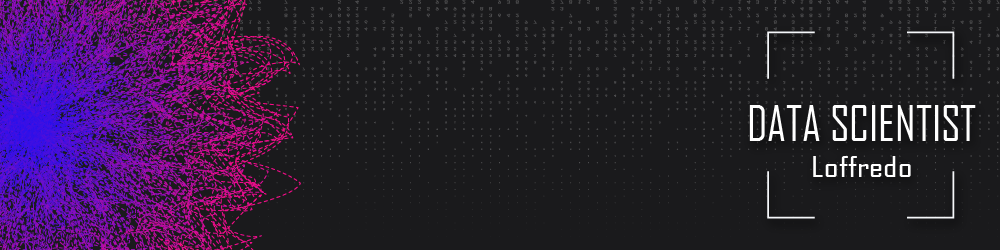

<div>
  <a href = "https://github.com/raffaloffredo/data_science_portfolio"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" target="_blank"></a>
  <a href="https://www.linkedin.com/in/raffaela-loffredo/?locale=en_US" target="_blank"><img src="https://img.shields.io/badge/-LinkedIn-%230077B5?style=for-the-badge&logo=linkedin&logoColor=white" target="_blank"></a>
  <a href="https://sites.google.com/view/loffredo/" target="_blank"><img src="	https://img.shields.io/badge/website-000000?style=for-the-badge&logo=About.me&logoColor=white" target="_blank"></a>
  <a href="https://instagram.com/loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/-Instagram-%23E4405F?style=for-the-badge&logo=instagram&logoColor=white" target="_blank"></a>
  <a href="https://medium.com/@loffredo.ds" target="_blank"><img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white"></a>
</div>

# Sobre o projeto

Esse documento faz parte do projeto "Do Excel à Análise de Dados" que tem por objetivo analisar ações de empresa da Bolsa do Brasil - B3 - e da bolsa dos Estados Unidos para mostrar minhas habilidades com o uso de planilhas, criação de fórmulas para se chegar no resultado obtido, desenvolvimento de análises de dados com criação de gráficos e previsão de séries temporais.

Acesse o projeto inteiro [aqui](https://github.com/raffaloffredo/do_excel_a_analise_de_dados).

# Criando Gráficos Candlestick com Matplotlib

![Candlestick Chart](https://i.imgur.com/84LtMlN.png)


![Candlestick](https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png)

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/

In [ ]:
# instalar pacotes adicionais
!pip install mplfinance -q  # visualização de dados financeiros

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd                         # manipulação de dados
import matplotlib.pyplot as plt             # criação de gráficos
import matplotlib.dates as mdates           # manipulação de datas em gráficos
import mplfinance as mpf                    # visualização de dados financeiros
import yfinance as yf                       # extração de dados financeiros
import plotly.graph_objects as go           # interface orientada à objetos para criação de gráficos
from plotly.subplots import make_subplots   # criação de múltiplos plots na mesma figure

import warnings                   # notificações
warnings.filterwarnings('ignore') # configurar notificações para serem ignoradas

# configurações adicionais
## estilo de gráficos
plt.style.use('seaborn-v0_8-deep')

# configurar a saída para mostrar todas as linhas e colunas
pd.options.display.max_columns  = None

# configurar saída de figuras em formato 'svg' (melhor qualidade)
%config InlineBackend.figure_format = 'svg'

In [ ]:
# criar variável dados e baixar informações das ações da Petrobrás para o ano de 2023
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

# visualizar data frame
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261330,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
# visualizar nome das colunas
dados.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# renomear colunas para PT-BR
dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fech_ajust', 'vol']

# renomear índica
dados = dados.rename_axis('data')

# visualizar alterações
dados.head()

,abertura,maximo,minimo,fechamento,fech_ajust,vol
data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261330,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500


# Gráficos

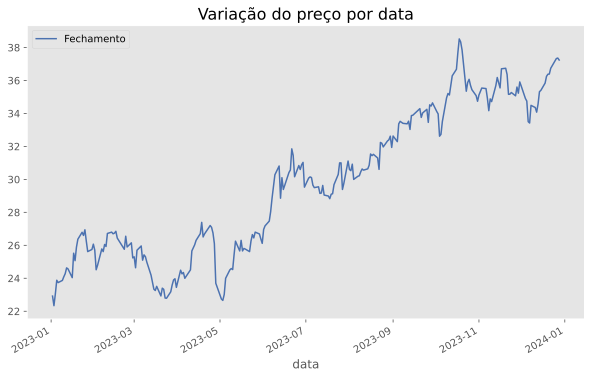

In [ ]:
# criar gráfico de linha com dados de fechamento do preço da PETR4
dados['fechamento'].plot(figsize=(10, 6))

# configurar título
plt.title('Variação do preço por data', fontsize=16)

# inserir legenda
plt.legend(['Fechamento'], loc='upper left')

# configurar para não mostrar linhas de grade
plt.grid(False)

In [ ]:
# selecionar uma amostra dos dados com apenas 60 registros
df = dados.head(60).copy()

# converter o índice na coluna de data
df['data'] = df.index

# converter as datas para o formato numérico de matplotlib
# é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df['data'] = df['data'].apply(mdates.date2num)

# visualizar data frame
df.head()

,abertura,maximo,minimo,fechamento,fech_ajust,vol,data
data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261330,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0


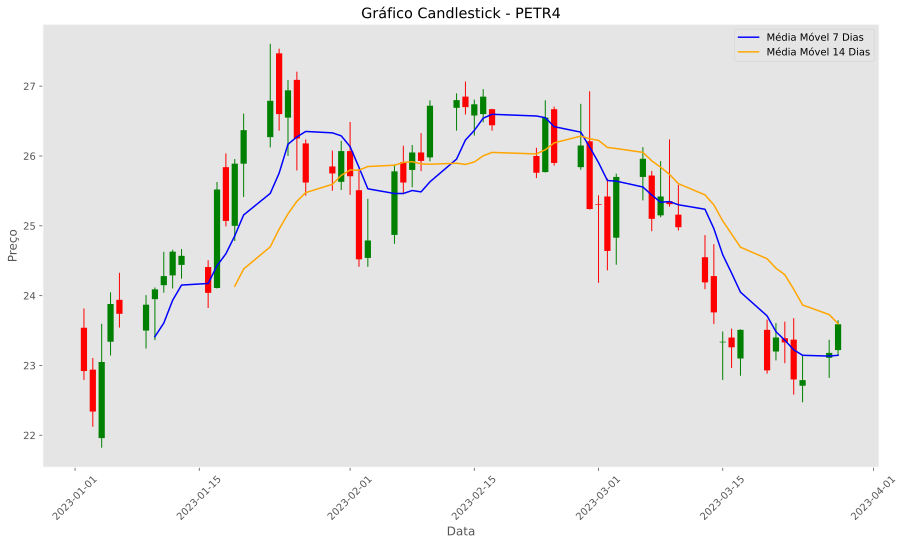

In [ ]:
# criar figure para o gráfico
fig, ax = plt.subplots(figsize=(15, 8))

# configurar largura dos candles
width = 0.7

# criar repetição para o tamanho do data frame
    # para colorir o candle de acordo com o preço de fechamento
      # se a ação subiu = verde
      # se a ação desceu = vermelho
      # ou, se o preço for igual = preto
for i in range(len(df)):
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'
    elif df['fechamento'].iloc[i] < df['abertura'].iloc[i]:
        color = 'red'
    else:
        color = 'black'

    # criar linha que inicia no preço minímo e vai até o preço máximo
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],
            color=color,
            linewidth=1)

    # criar corpo do candle com o método rectangle
    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                                  width,
                                  abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                                  facecolor=color))

# criar médias móveias de 7 e de 14 diass
df['mm7'] = df['fechamento'].rolling(window=7).mean()
df['mm14'] = df['fechamento'].rolling(window=14).mean()

# plotar médias móveis
ax.plot(df['data'], df['mm7'], color='blue', label='Média Móvel 7 Dias')
ax.plot(df['data'], df['mm14'], color='orange', label='Média Móvel 14 Dias')

# inserir legendas
ax.legend()

# formatar o eixo x para mostrar as datas
# configurar o formato da data e a rotação para melhor legibilidade
# informar que data está no eixo x
ax.xaxis_date()
# configurar no formato AAAA-MM-DD
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# rotacionar o texto em 45 graus
plt.xticks(rotation=45)

# inserir título e rótulos para os eixos
plt.title('Gráfico Candlestick - PETR4')
plt.xlabel('Data')
plt.ylabel('Preço')

# configurar para não mostrar linhas de grade
plt.grid(False)

# mostrar gráfico
plt.show()

## Gráfico Interativo

In [ ]:
# criar figure e subplots (um para o gráfico candlestick e outro para o volume de transações)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

# configurar gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# configurar médias móveis
fig.add_trace(go.Scatter(x=df.index,
                         y=df['mm7'],
                         mode='lines',
                         name='mm7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['mm14'],
                         mode='lines',
                         name='MM14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# configurar gráfico de barras para o volume
fig.add_trace(go.Bar(x=df.index,
                     y=df['vol'],
                     name='Volume'),
                     row=2, col=1)

# configurar layout
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # desativra o range slider
                  showlegend=False,
                  width=1100, height=600,
                  xaxis_showgrid=False, yaxis_showgrid=False,  # desativar as linhas de grade no candlestick
                  xaxis2_showgrid=False, yaxis2_showgrid=False)  # desativar as linhas de grade no volume

# mostrar gráfico
fig.show()

[*********************100%%**********************]  1 of 1 completed


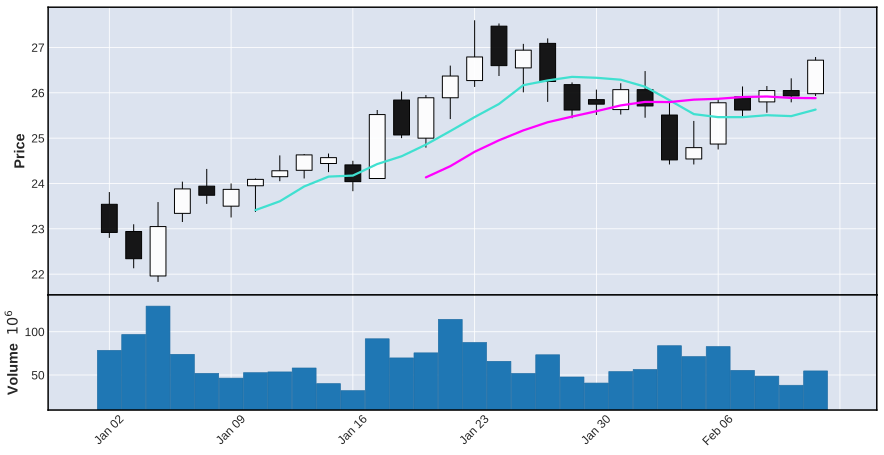

In [ ]:
# criar variável dados e baixar informações das ações da Petrobrás para o ano de 2023
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

# criar gráfico direto com apenas 1 linha de código
mpf.plot(dados.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14))